In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth1 = pd.read_csv(DATA_DIR + 'illness/national_illness.csv', index_col=0)

In [4]:
etth1.head()

,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
date,,,,,,,
2002-01-01 00:00:00,1.22262,1.16668,582,805,2060,754,176569
2002-01-08 00:00:00,1.33344,1.21650,683,872,2267,785,186355
2002-01-15 00:00:00,1.31929,1.13057,642,878,2176,831,192469
2002-01-22 00:00:00,1.49484,1.25246,728,1045,2599,863,207512
2002-01-29 00:00:00,1.47195,1.30237,823,1189,2907,909,223208


In [8]:
etth1.shape

(966, 7)

<Axes: xlabel='date'>

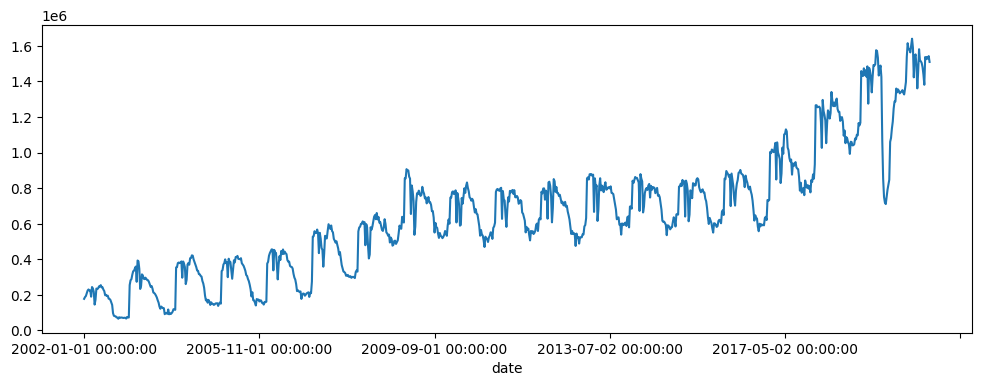

In [5]:
plt.figure(figsize=(12,4))
etth1['OT'].plot()

In [6]:
scaler = MinMaxScaler()
timeseries = etth1['OT']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

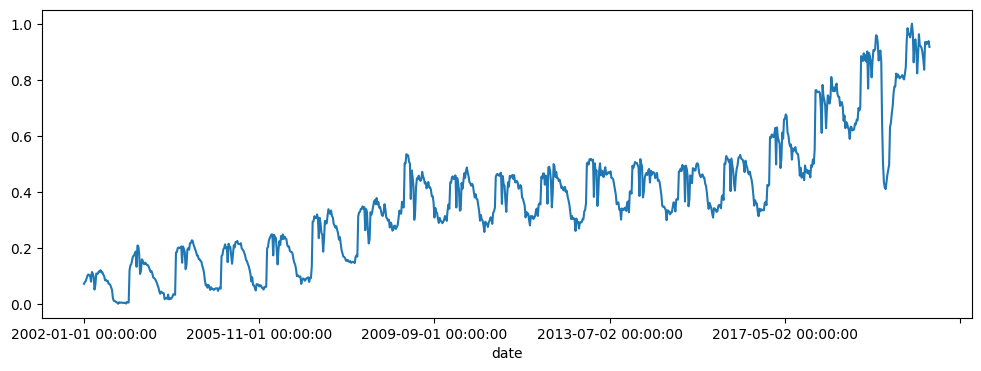

In [7]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [10]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1782597822
Epoch 2, Boundaries delta: 0.0718293689, Codewords delta: 0.0557263148
Epoch 3, Boundaries delta: 0.0503496083, Codewords delta: 0.0404375921
Epoch 4, Boundaries delta: 0.0369824433, Codewords delta: 0.0294336390
Epoch 5, Boundaries delta: 0.0264896457, Codewords delta: 0.0224707450
Epoch 6, Boundaries delta: 0.0198684534, Codewords delta: 0.0176888060
Epoch 7, Boundaries delta: 0.0155527010, Codewords delta: 0.0140251026
Epoch 8, Boundaries delta: 0.0124788527, Codewords delta: 0.0110926131
Epoch 9, Boundaries delta: 0.0103096807, Codewords delta: 0.0091256385
Epoch 10, Boundaries delta: 0.0087819742, Codewords delta: 0.0077312902
Epoch 11, Boundaries delta: 0.0076478207, Codewords delta: 0.0066745751
Epoch 12, Boundaries delta: 0.0067659840, Codewords delta: 0.0059462644
Epoch 13, Boundaries delta: 0.0060896825, Codewords delta: 0.0054757287
Epoch 14, Boundaries delta: 0.0055706215, Codewords delta: 0.0051093152
E

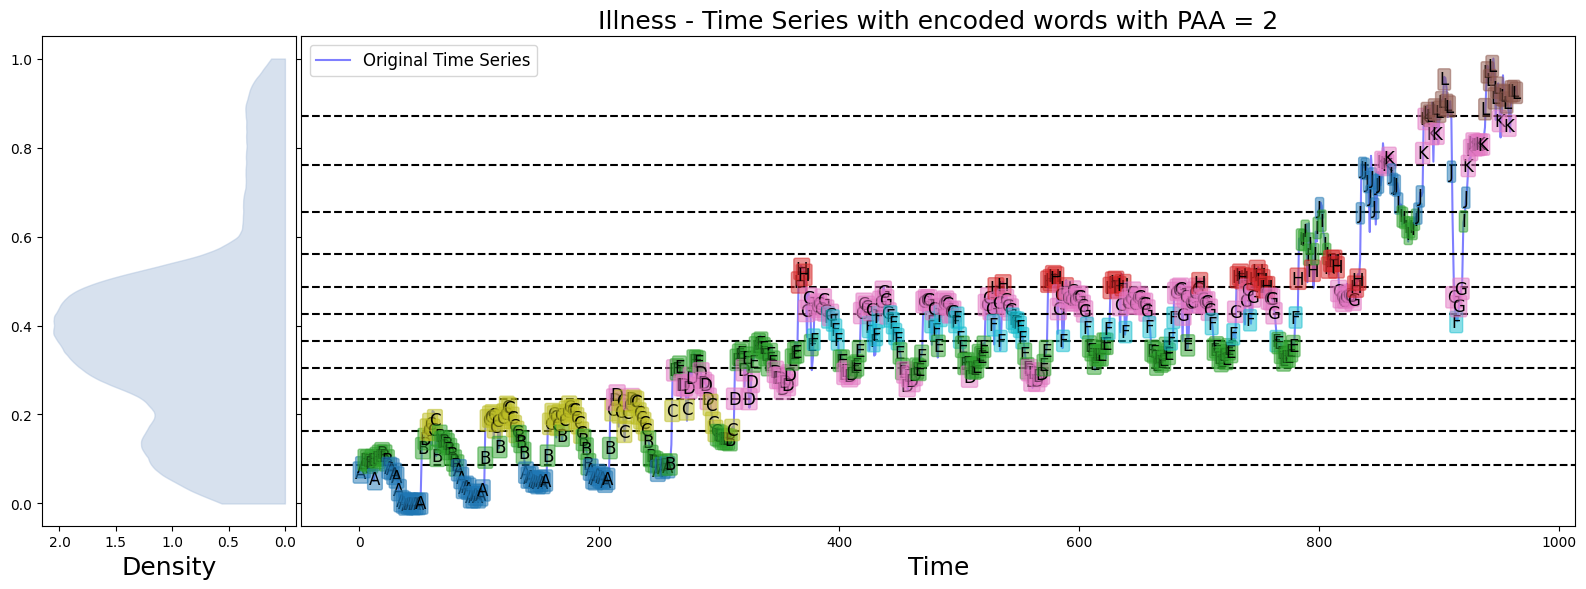

In [11]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=2)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="illness/ETTh1_ksax.png", data_name='Illness')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"illness/illness_ksax.csv")

### Stationary

In [12]:
target = etth1['OT']
target = target.diff().dropna()

In [13]:
target.head()

date
2002-01-08 00:00:00     9786.0
2002-01-15 00:00:00     6114.0
2002-01-22 00:00:00    15043.0
2002-01-29 00:00:00    15696.0
2002-02-05 00:00:00     6246.0
Name: OT, dtype: float64

Epoch 1, Boundaries delta: 132387.8282541138, Codewords delta: 208381.3117053582
Epoch 2, Boundaries delta: 132387.8282541138, Codewords delta: 0.0000000000
Epoch 3, Boundaries delta: 0.0000000000, Codewords delta: 0.0000000000
Stopping criteria reached. Terminating training.
Plot saved to ../images/
Generated codewords saved to ../data/illness/illness_stationary_ksax.csv
Boundaries saved to ../data/illness/illness_stationary_ksax_boundaries.csv


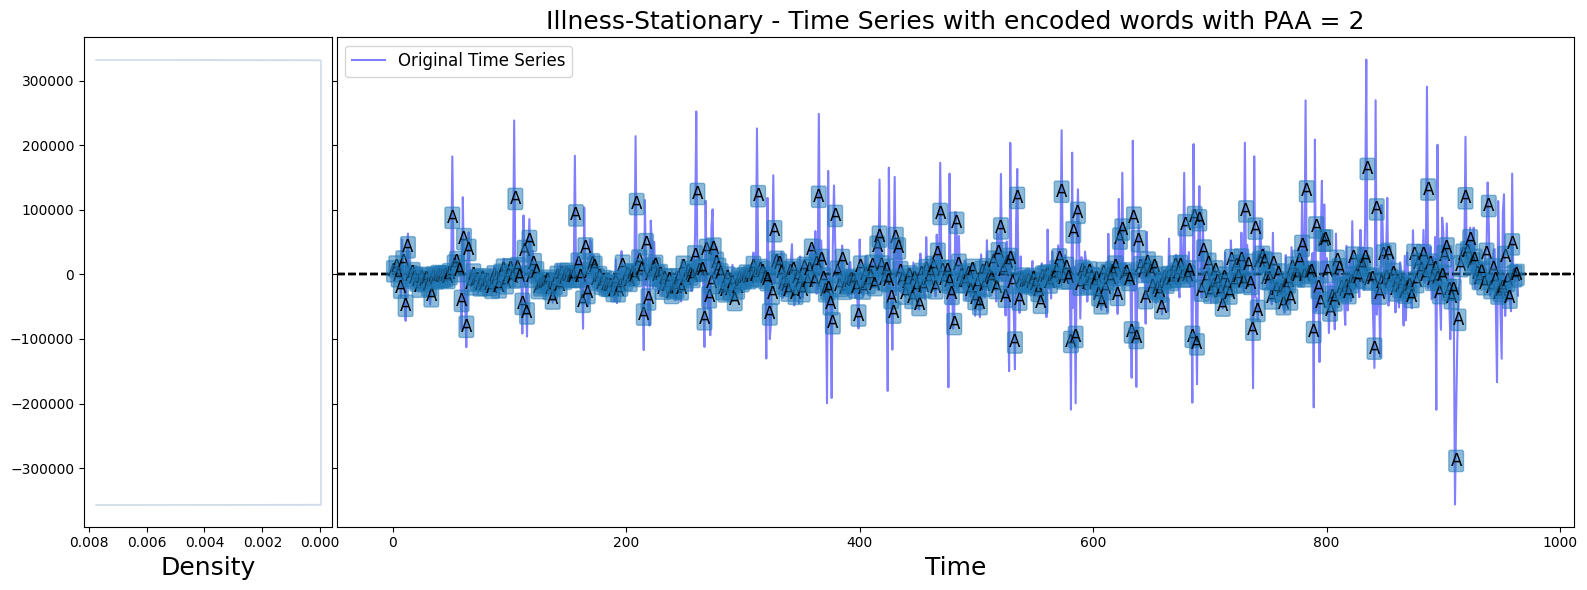

In [14]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=2)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="illness/illness_stationary_ksax.png", data_name='Illness-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"illness/illness_stationary_ksax.csv")